In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Dhaka Rent.csv.csv')

In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.tail()

,area,rent
55,3100,54000
56,2750,48500
57,1800,25100
58,2200,31560
59,3100,51600


In [5]:
df.head(7)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100
5,1900,32500
6,1500,20000


In [6]:
df.area.head(3)

0    2000
1    2100
2    2500
Name: area, dtype: int64

In [7]:
df.rent.head(3)

0    31500
1    35000
2    41050
Name: rent, dtype: int64

In [8]:
df[5:6]

,area,rent
5,1900,32500


In [9]:
df[5:10]

,area,rent
5,1900,32500
6,1500,20000
7,1850,24500
8,2700,48000
9,2100,31000


In [10]:
df.mean()

area     2289.000000
rent    37269.166667
dtype: float64

In [11]:
df.area.mean()

2289.0

In [12]:
df.rent.mean()

37269.166666666664

In [13]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


In [15]:
df.area.std()

538.8805093801691

In [16]:
df.shape

(60, 2)

In [17]:
df.isnull().sum()

area    0
rent    0
dtype: int64

# Vizualisation

Text(0.5, 1.0, 'Rent plot')

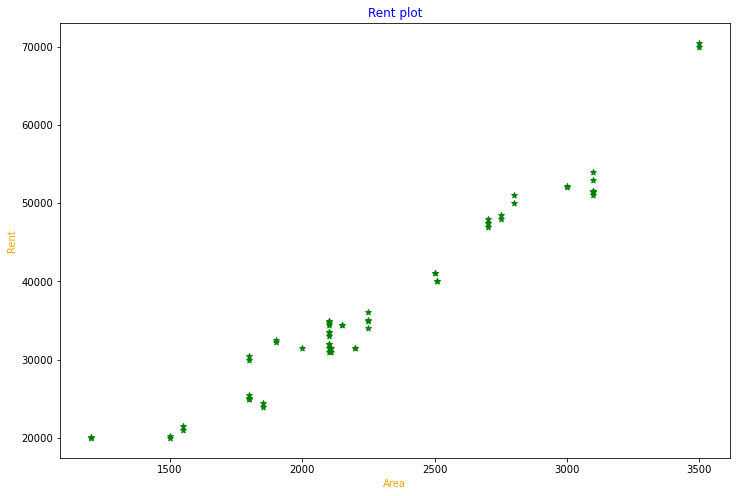

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(df.area, df.rent,marker='*',color='green')
plt.xlabel('Area', color='orange')
plt.ylabel('Rent', color='orange')
plt.title('Rent plot', color = 'blue')

In [27]:
x = df['area'] # single dim not allowed
y = ['rent']

In [28]:
x.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [29]:
x = df[['area']] # x = df.drop('area', axis=1) ; x = df.drop(columns=['area'])
y = df['rent']

In [30]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


# Split the dataste into train and test

In [31]:
from sklearn.model_selection import train_test_split as tts

In [32]:
xtrain, xtest, ytrain, ytest = tts(x,y,test_size = .30)

In [33]:
xtrain.head()

,area
39,2100
29,3100
58,2200
20,2110
26,2750


In [34]:
ytrain.head()

39    31500
29    51400
58    31560
20    31500
26    48000
Name: rent, dtype: int64

# Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
reg = LinearRegression()

In [38]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [39]:
m = reg.coef_
m

array([20.37829612])

In [40]:
c=reg.intercept_
c

-9478.749088939534

In [41]:
x1 = 2100
y = m*x1+c

In [42]:
y

array([33315.67275545])

In [43]:
reg.predict([[2100]])

C:\Users\Pilow\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33315.67275545])

In [44]:
pred = reg.predict(xtest)
pred

array([27202.18392054, 34334.58756127, 45542.65042527, 33315.67275545,
       28221.09872635, 33519.45571661, 33315.67275545, 21088.69508562,
       53693.96887182, 53693.96887182, 61845.28731837, 33315.67275545,
       47580.48003691, 45542.65042527, 41466.991202  , 46561.56523109,
       33315.67275545, 53693.96887182])

In [46]:
df['predicted result']=reg.predict(x)

In [47]:
df.head()

,area,rent,predicted result
0,2000,31500,31277.843144
1,2100,35000,33315.672755
2,2500,41050,41466.991202
3,2250,36100,36372.417173
4,3000,52100,51656.139260


In [48]:
x1=2000
y=m*x1+c
y

array([31277.84314381])

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [50]:
mse = mean_squared_error(ytest, pred)

In [51]:
mse

7207362.988657897

# Best fit line

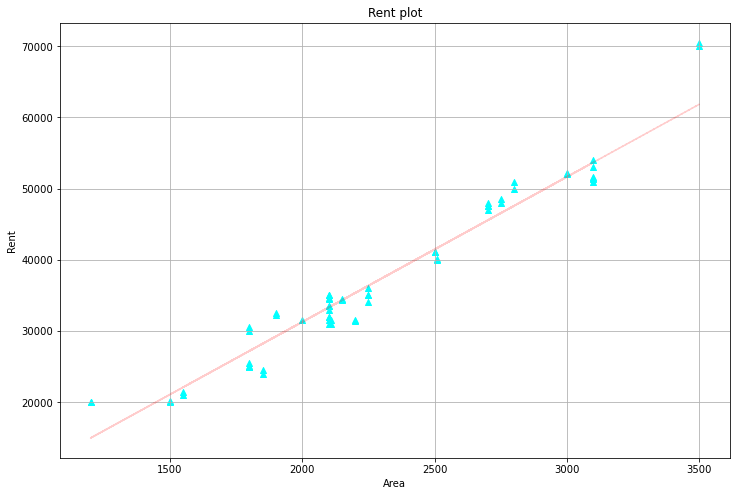

In [57]:
plt.figure(figsize=(12,8))
plt.scatter(df.area,df.rent,color='cyan',marker='^')
plt.xlabel("Area")
plt.ylabel("Rent")
plt.title("Rent plot",color='Black')
plt.grid()
plt.plot(xtrain.squeeze() , reg.predict(xtrain),'r--',alpha=0.2)

In [58]:
import warnings
warnings.filterwarnings('ignore')

reg.predict([[2500]])

array([41466.991202])

In [59]:
reg.score(xtest, ytest)

0.954327602806831

In [60]:
from sklearn.metrics import r2_score
r2_score(ytest, pred)

0.954327602806831